In [1]:
import findspark
findspark.init()
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [5]:
import numpy as np

x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
#x=np.array([0.5,2.3,2.9])
#y=np.array([1.4,1.9,3.2])

In [6]:
x=np.array([x, np.ones(len(x))])  # w0 * x0 + w1 * x1

In [7]:
x=x.T

In [8]:
x, x.shape


(array([[1., 1.],
        [2., 1.],
        [3., 1.],
        [4., 1.]]),
 (4, 2))

In [9]:
alpha = 0.01

In [10]:
theta=np.ones([x.shape[1]])

In [11]:
theta

array([1., 1.])

In [13]:
np.dot(x, theta)

array([2., 3., 4., 5.])

In [14]:
def h(x, theta):
    return np.dot(x, theta)

h(x,theta)

array([2., 3., 4., 5.])

In [15]:
file_name="http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"

In [16]:
import pandas as pd

column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]
abalone = pd.read_csv(file_name, names=column_names)

In [17]:
abalone.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [18]:
abalone["age"] = 1.5 * abalone["rings"]

In [19]:
abalone.sample(n=5)

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,age
1650,I,0.590,0.46,0.145,0.9015,0.4190,0.1785,0.260,11,16.5
3100,M,0.580,0.43,0.125,0.9115,0.4460,0.2075,0.121,10,15.0
1188,F,0.690,0.54,0.155,1.4540,0.6240,0.3105,0.390,9,13.5
2665,F,0.575,0.48,0.150,0.8970,0.4235,0.1905,0.248,8,12.0
1605,I,0.540,0.42,0.140,0.6275,0.2505,0.1175,0.235,9,13.5


In [20]:
abalone = abalone[abalone['height']>0]

In [21]:
abalone.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,age
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090,14.902635
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227,4.836341
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000,1.500000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000,12.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000,13.500000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000,16.500000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,43.500000


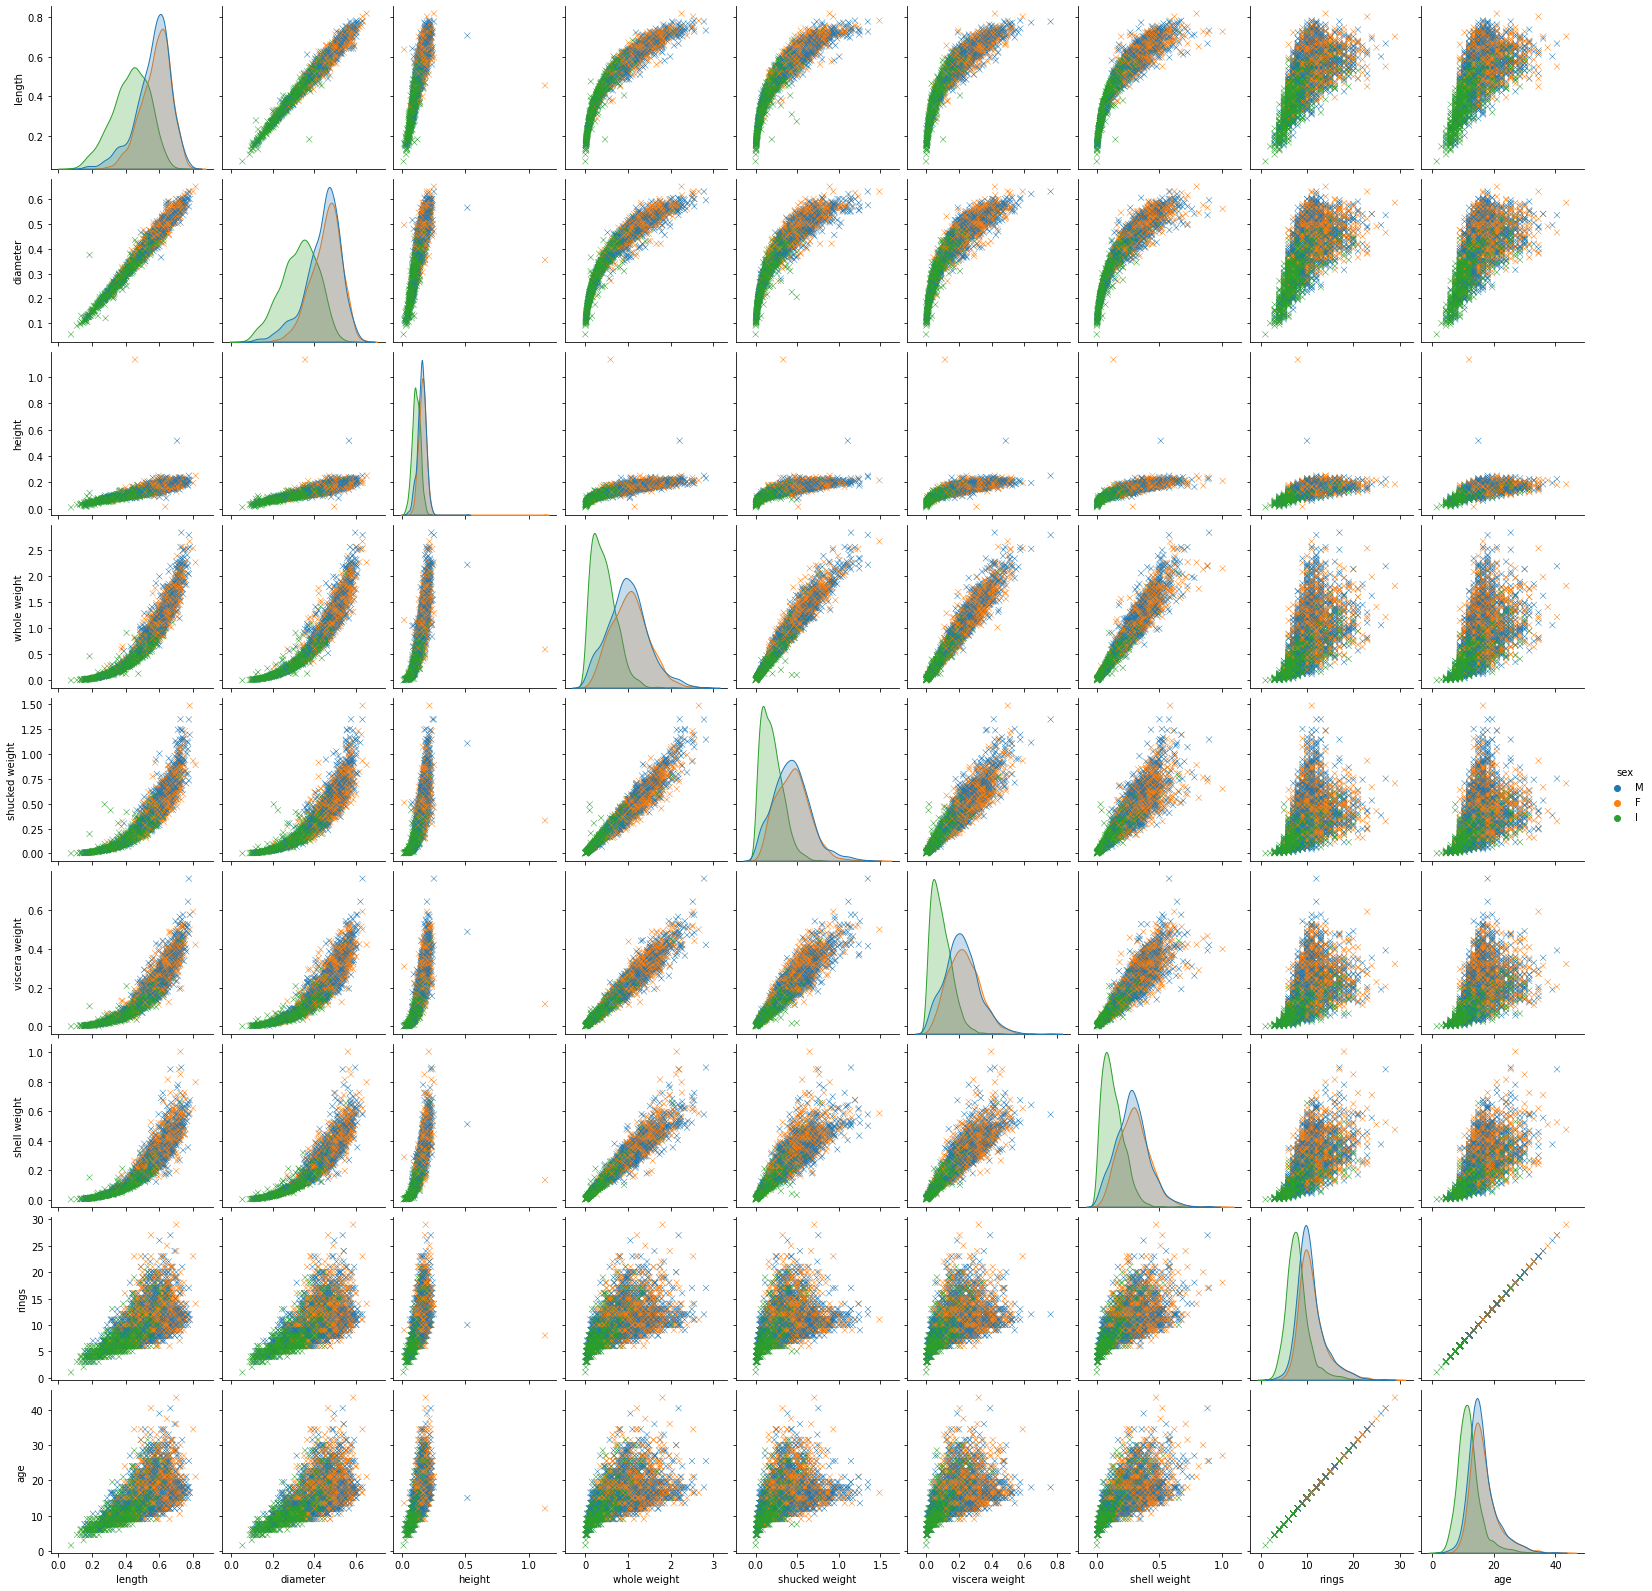

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(abalone, hue='sex', markers='x', diag_kind="kde")
#plt.show()

<AxesSubplot:>

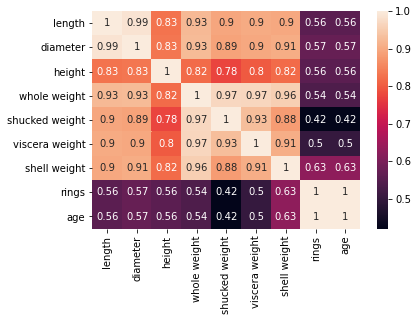

In [23]:
%matplotlib inline
corr = abalone.corr()
sns.heatmap(corr, annot=True)
#plt.show()

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[("sex", OneHotEncoder(handle_unknown='ignore'), [0])],
                       remainder = 'passthrough')
X = ct.fit_transform(abalone)

In [28]:
_abalone = pd.DataFrame(X)

In [29]:
_abalone

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0,22.5,1.0,0.0,0.0
1,0.0,0.0,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0,10.5,1.0,0.0,0.0
2,1.0,0.0,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0,13.5,0.0,1.0,0.0
3,0.0,0.0,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0,15.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0,10.5,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4170,1.0,0.0,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0,16.5,0.0,1.0,0.0
4171,0.0,0.0,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0,15.0,1.0,0.0,0.0
4172,0.0,0.0,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0,13.5,1.0,0.0,0.0
4173,1.0,0.0,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0,15.0,0.0,1.0,0.0


In [30]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(abalone, train_size=0.6)

In [31]:
from sklearn import linear_model

xtrain = train.drop(['age','rings','sex'],axis=1)
ytrain = train['age']
xtest = test.drop(['age','rings','sex'],axis=1)
ytest = test['age']

In [32]:
xtrain.head()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,Male,Female,Infant
2631,0.375,0.290,0.100,0.2190,0.0925,0.0380,0.0750,0,0,1
243,0.300,0.230,0.080,0.1275,0.0435,0.0265,0.0400,0,0,1
1201,0.720,0.565,0.145,1.1870,0.6910,0.1945,0.2685,1,0,0
1762,0.770,0.620,0.195,2.5155,1.1155,0.6415,0.6420,1,0,0
2569,0.460,0.345,0.115,0.4215,0.1895,0.1020,0.1110,0,0,1


In [33]:
regression = linear_model.LinearRegression()
trainModel = regression.fit(xtrain, ytrain)

In [34]:
trainModel.intercept_

5.215898770719656

In [35]:
trainModel.coef_

array([ -0.66276334,  18.55915911,  11.9982165 ,  15.64701841,
       -32.47213302, -17.53586496,  10.97614247,   0.44905388,
         0.36506041,  -0.8141143 ])

In [36]:
list(zip(xtrain.columns,regression.coef_))

[('length', -0.6627633355822314),
 ('diameter', 18.559159114706524),
 ('height', 11.998216497393633),
 ('whole weight', 15.647018410489084),
 ('shucked weight', -32.47213301559395),
 ('viscera weight', -17.53586495805201),
 ('shell weight', 10.97614246780435),
 ('Male', 0.44905388381747763),
 ('Female', 0.365060414175931),
 ('Infant', -0.8141142979933771)]

In [37]:
accuracy = regression.score(xtest,ytest)

In [38]:
f"accuracy: {accuracy*100:.2f}%"

'accuracy: 52.13%'

In [39]:
ypred = regression.predict(xtest)

In [40]:
y_actual_pred = pd.DataFrame({'Actual': ytest, 'Predicted': ypred.flatten()})

In [41]:
y_actual_pred.head()

,Actual,Predicted
272,21.0,23.038711
4099,13.5,14.989062
432,27.0,19.629929
3612,15.0,19.556882
2867,9.0,9.735255


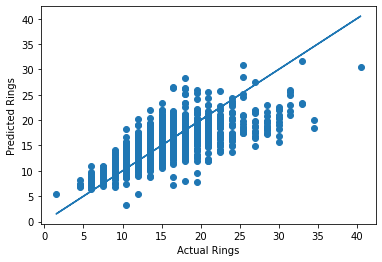

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(ytest,ypred)
ax.set_ylabel('Predicted Rings') 
ax.set_xlabel('Actual Rings')
ax.plot(ytest,ytest)